<a href="https://colab.research.google.com/github/buthaina279/LSTM_MIMIC-III/blob/main/pearson_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for google drive
DATA_FILEPATH = "/content/drive/MyDrive/final_project/"

In [ ]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv(DATA_FILEPATH + 'train.csv',index_col=0) 
validation = pd.read_csv(DATA_FILEPATH + 'validation.csv',index_col=0) 
test = pd.read_csv(DATA_FILEPATH + 'test.csv',index_col=0) 

In [ ]:
train.shape

(465471, 80)

#Pearson correlation

In [ ]:
corr_matrix=train.corr()
corr_matrix["mort_icu"].sort_values(ascending=False)

mort_icu                   1.000000
cmo                        0.438845
cmo_last                   0.436582
dnr                        0.291769
cmo_first                  0.117005
                             ...   
admission_type_ELECTIVE   -0.103481
oxygen saturation_mean    -0.110464
first_careunit_CSRU       -0.116678
fullcode_first            -0.133571
fullcode                  -0.134689
Name: mort_icu, Length: 80, dtype: float64

##Positive correlation

In [ ]:
corr_matrix["mort_icu"].sort_values(ascending=False)[1:11]

cmo                         0.438845
cmo_last                    0.436582
dnr                         0.291769
cmo_first                   0.117005
los_icu                     0.108830
max_hours                   0.108793
glucose_mean                0.105109
dnr_first                   0.103653
admission_type_EMERGENCY    0.096365
heart rate_mean             0.089516
Name: mort_icu, dtype: float64

##Negative correlation

In [ ]:
corr_matrix["mort_icu"].sort_values(ascending=False)[-10:]

insurance_Private               -0.053264
mean blood pressure_mean        -0.058193
readmission_30                  -0.060068
diastolic blood pressure_mean   -0.060840
systolic blood pressure_mean    -0.090264
admission_type_ELECTIVE         -0.103481
oxygen saturation_mean          -0.110464
first_careunit_CSRU             -0.116678
fullcode_first                  -0.133571
fullcode                        -0.134689
Name: mort_icu, dtype: float64

##Plot positive correlation

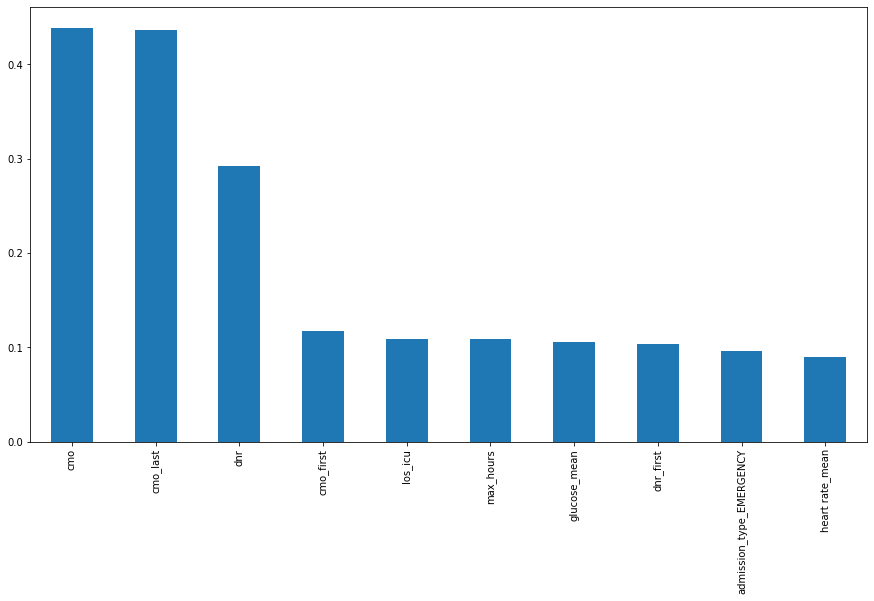

In [ ]:
import matplotlib.pyplot as plt

#let's plot the ordered mutual_info values per feature
corr_matrix["mort_icu"].sort_values(ascending=False)[1:11].plot.bar(figsize=(15, 8), orientation='vertical')

##Plot negative correlation

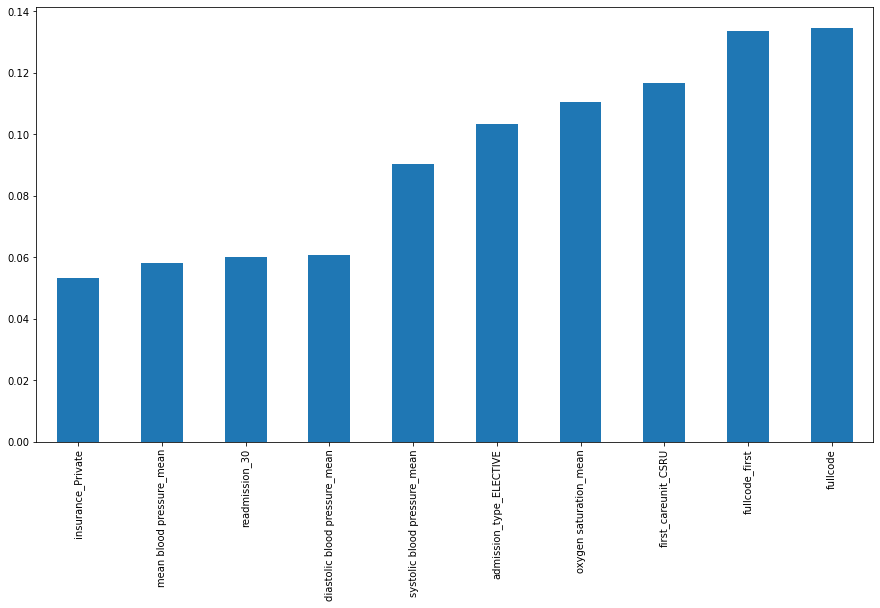

In [ ]:
import matplotlib.pyplot as plt

#let's plot the ordered mutual_info values per feature
abs(corr_matrix["mort_icu"].sort_values(ascending=False)[70:80]).plot.bar(figsize=(15, 8), orientation='vertical')

##Take the top 20 in addition to the IDs and the target

In [ ]:
list_best20 = ['subject_id',
            'hadm_id',
            'icustay_id',
           'hours_in',
            'los_icu',
            "cmo",                       
            "cmo_last",                   
            "dnr",                        
            "cmo_first" ,                
            "los_icu",                   
            "max_hours",                   
            "glucose_mean",              
            "dnr_first",                 
            "admission_type_EMERGENCY",
            "heart rate_mean", 
            'insurance_Private',            
            'mean blood pressure_mean',        
            'readmission_30',                  
            'diastolic blood pressure_mean',
            'systolic blood pressure_mean',   
            'admission_type_ELECTIVE' ,        
            'oxygen saturation_mean',          
            'first_careunit_CSRU',             
            'fullcode_first' ,               
            'fullcode',                 
                'mort_icu']

In [ ]:
train_20 = train[list_best20]
train_20.head()

,subject_id,hadm_id,icustay_id,hours_in,los_icu,cmo,cmo_last,dnr,cmo_first,los_icu,...,mean blood pressure_mean,readmission_30,diastolic blood pressure_mean,systolic blood pressure_mean,admission_type_ELECTIVE,oxygen saturation_mean,first_careunit_CSRU,fullcode_first,fullcode,mort_icu
0,90863,152704,290512,0,1.777801,0.0,0.0,0.0,0.0,1.777801,...,105.5,0,87.5,172.0,0,99.0,0,1.0,1.0,0
1,90863,152704,290512,1,1.777801,0.0,0.0,0.0,0.0,1.777801,...,79.0,0,68.0,113.0,0,98.5,0,1.0,1.0,0
2,90863,152704,290512,2,1.777801,0.0,0.0,0.0,0.0,1.777801,...,89.0,0,77.0,124.0,0,100.0,0,1.0,1.0,0
3,90863,152704,290512,3,1.777801,0.0,0.0,0.0,0.0,1.777801,...,83.0,0,71.0,123.0,0,99.0,0,1.0,1.0,0
4,90863,152704,290512,4,1.777801,0.0,0.0,0.0,0.0,1.777801,...,83.0,0,71.0,123.0,0,97.0,0,1.0,1.0,0


In [ ]:
validation_20 = validation[list_best20]
validation_20.head()

,subject_id,hadm_id,icustay_id,hours_in,los_icu,cmo,cmo_last,dnr,cmo_first,los_icu,...,mean blood pressure_mean,readmission_30,diastolic blood pressure_mean,systolic blood pressure_mean,admission_type_ELECTIVE,oxygen saturation_mean,first_careunit_CSRU,fullcode_first,fullcode,mort_icu
0,54135,150600,228783,0,1.134317,0.0,0.0,1.0,0.0,1.134317,...,93.0,0,83.0,126.0,0,99.5,0,0.0,0.0,0
1,54135,150600,228783,1,1.134317,0.0,0.0,1.0,0.0,1.134317,...,83.0,0,68.5,123.5,0,98.0,0,0.0,0.0,0
2,54135,150600,228783,2,1.134317,0.0,0.0,1.0,0.0,1.134317,...,92.0,0,77.0,144.0,0,100.0,0,0.0,0.0,0
3,54135,150600,228783,3,1.134317,0.0,0.0,1.0,0.0,1.134317,...,87.0,0,75.0,126.0,0,96.0,0,0.0,0.0,0
4,54135,150600,228783,4,1.134317,0.0,0.0,1.0,0.0,1.134317,...,91.0,0,79.0,126.0,0,99.0,0,0.0,0.0,0


In [ ]:
test_20 = test[list_best20]
test_20.head()

,subject_id,hadm_id,icustay_id,hours_in,los_icu,cmo,cmo_last,dnr,cmo_first,los_icu,...,mean blood pressure_mean,readmission_30,diastolic blood pressure_mean,systolic blood pressure_mean,admission_type_ELECTIVE,oxygen saturation_mean,first_careunit_CSRU,fullcode_first,fullcode,mort_icu
0,11431,133663,262203,0,6.435521,0.0,0.0,0.0,0.0,6.435521,...,97.00,0,61.000000,164.000000,0,97.0,0,1.0,1.0,0
1,11431,133663,262203,1,6.435521,0.0,0.0,0.0,0.0,6.435521,...,97.00,0,61.000000,164.000000,0,98.0,0,1.0,1.0,0
2,11431,133663,262203,2,6.435521,0.0,0.0,0.0,0.0,6.435521,...,93.00,0,80.666667,114.333333,0,100.0,0,1.0,1.0,0
3,11431,133663,262203,3,6.435521,0.0,0.0,0.0,0.0,6.435521,...,102.25,0,88.250000,132.000000,0,100.0,0,1.0,1.0,0
4,11431,133663,262203,4,6.435521,0.0,0.0,0.0,0.0,6.435521,...,102.25,0,76.000000,135.000000,0,100.0,0,1.0,1.0,0


In [ ]:
train_20.to_csv(DATA_FILEPATH +'train_20.csv')
validation_20.to_csv(DATA_FILEPATH +'validation_20.csv')
test_20.to_csv(DATA_FILEPATH +'test_20.csv')